In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torchvision import datasets,transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)


In [ ]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

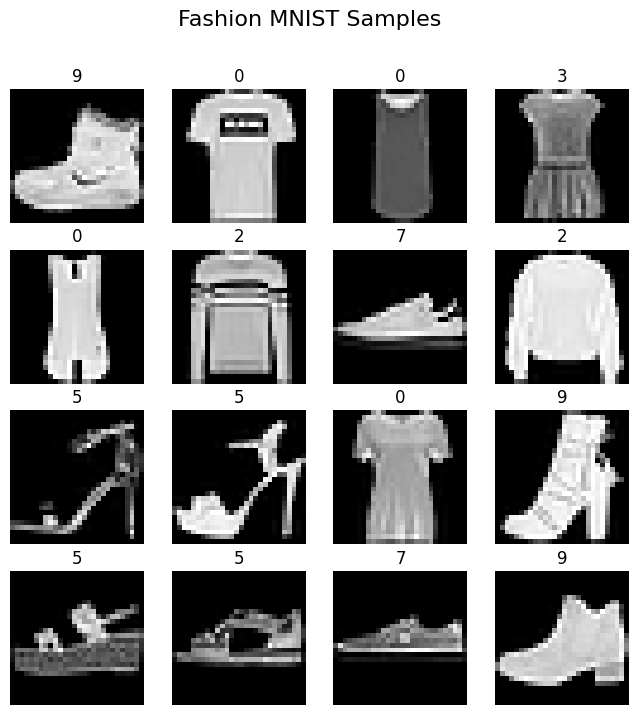

In [ ]:
# prompt: create a 4x4 grid, to visualize intial 16 datasets with their label

import matplotlib.pyplot as plt

# Assuming the first 16 images and labels are in train_data
figure = plt.figure(figsize=(8, 8))
figure.suptitle("Fashion MNIST Samples", fontsize=16)  # Add title here

cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = i - 1
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
# 'train_data.targets' contains your target labels
train_dataset = torch.utils.data.TensorDataset(train_data.data.view(-1, 28*28), train_data.targets)
test_dataset = torch.utils.data.TensorDataset(test_data.data.view(-1, 28*28), test_data.targets)


In [ ]:
train_dataset[0]

(tensor([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
new_train = train_dataset.tensors[0]/255
new_test = test_dataset.tensors[0]/255

In [ ]:
new_train[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0039, 0.0039, 0.0000, 

In [ ]:
new_test[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
new_train.data[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
        0.0510, 0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0039, 0.0039, 0.0000, 

In [ ]:
class customDataset(Dataset):

  def __init__(self,features,labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index],self.labels[index]

In [ ]:
new_train_data=customDataset(new_train,train_dataset.tensors[1])
new_test_data=customDataset(new_test,test_dataset.tensors[1])

In [ ]:
new_train.shape

torch.Size([60000, 784])

In [ ]:
train_loader = DataLoader(new_train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(new_test_data, batch_size=64, shuffle=False)

In [ ]:
learning_rate = 0.001
epochs = 50

# **Trainig with Sigoid Activation and SGD as Optimizer**

In [ ]:
class myNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.Sigmoid(),
        nn.Linear(512,128),
        nn.Sigmoid(),
        nn.Linear(128,10)
    )

  def forward(self,x):
      return self.model(x)



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = myNN(new_train.shape[1]).to(device)

In [ ]:
##Loss Function
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features,batch_lables in train_loader:

    batch_features,batch_lables = batch_features.to(device),batch_lables.to(device)

    output = model(batch_features)

    loss = criterion(output,batch_lables)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch: {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

Epoch: 1/50, Loss: 2.2929
Epoch: 2/50, Loss: 2.2510
Epoch: 3/50, Loss: 2.0768
Epoch: 4/50, Loss: 1.7178
Epoch: 5/50, Loss: 1.4402
Epoch: 6/50, Loss: 1.2506
Epoch: 7/50, Loss: 1.1374
Epoch: 8/50, Loss: 1.0609
Epoch: 9/50, Loss: 1.0010
Epoch: 10/50, Loss: 0.9507
Epoch: 11/50, Loss: 0.9072
Epoch: 12/50, Loss: 0.8680
Epoch: 13/50, Loss: 0.8318
Epoch: 14/50, Loss: 0.7980
Epoch: 15/50, Loss: 0.7669
Epoch: 16/50, Loss: 0.7394
Epoch: 17/50, Loss: 0.7154
Epoch: 18/50, Loss: 0.6953
Epoch: 19/50, Loss: 0.6785
Epoch: 20/50, Loss: 0.6645
Epoch: 21/50, Loss: 0.6522
Epoch: 22/50, Loss: 0.6414
Epoch: 23/50, Loss: 0.6313
Epoch: 24/50, Loss: 0.6224
Epoch: 25/50, Loss: 0.6137
Epoch: 26/50, Loss: 0.6058
Epoch: 27/50, Loss: 0.5979
Epoch: 28/50, Loss: 0.5909
Epoch: 29/50, Loss: 0.5841
Epoch: 30/50, Loss: 0.5778
Epoch: 31/50, Loss: 0.5715
Epoch: 32/50, Loss: 0.5656
Epoch: 33/50, Loss: 0.5600
Epoch: 34/50, Loss: 0.5548
Epoch: 35/50, Loss: 0.5497
Epoch: 36/50, Loss: 0.5449
Epoch: 37/50, Loss: 0.5404
Epoch: 38/

KeyboardInterrupt: 

In [ ]:
model.eval()

myNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluation loop for test data
correct_predictions = 0
total_predictions = 0
test_loss = 0

with torch.no_grad():  # Disable gradient calculations during evaluation
    for batch_features, batch_labels in test_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = model(batch_features)

        # Calculate loss on the test set
        loss = criterion(outputs, batch_labels)
        test_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        total_predictions += batch_labels.size(0)
        correct_predictions += (predicted == batch_labels).sum().item()

avg_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct_predictions / total_predictions

print(f"Test Loss: {avg_test_loss:.4f}")
print(f"Accuracy on test data: {accuracy:.2f}%")

# Analyze the difference between training and testing loss
# A significant difference may indicate overfitting.

# Example analysis:
if abs(avg_loss - avg_test_loss) > 0.1:  # Adjust threshold as needed
    print("Warning: Large difference between training and testing loss. Possible overfitting.")
else:
    print("Training and testing loss are relatively close.")

Test Loss: 0.5241
Accuracy on test data: 81.37%
Training and testing loss are relatively close.


In [ ]:
# Evaluation loop for train data
correct_predictions = 0
total_predictions = 0
test_loss = 0

with torch.no_grad():  # Disable gradient calculations during evaluation
    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        outputs = model(batch_features)

        # Calculate loss on the test set
        loss = criterion(outputs, batch_labels)
        test_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        total_predictions += batch_labels.size(0)
        correct_predictions += (predicted == batch_labels).sum().item()

avg_test_loss = test_loss / len(test_loader)
accuracy = 100 * correct_predictions / total_predictions

print(f"Train Loss: {avg_test_loss:.4f}")
print(f"Accuracy on train data: {accuracy:.2f}%")

# Analyze the difference between training and testing loss
# A significant difference may indicate overfitting.

# Example analysis:
if abs(avg_loss - avg_test_loss) > 0.1:  # Adjust threshold as needed
    print("Warning: Large difference between training and testing loss. Possible overfitting.")
else:
    print("Training and testing loss are relatively close.")

Train Loss: 2.9495
Accuracy on train data: 82.51%


## After doing parameter tuning, result is below.

In [ ]:
class myNN_PT(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.BatchNorm1d(512),
        nn.Sigmoid(),
        nn.Dropout(p=0.3),
        nn.Linear(512,128),
        nn.BatchNorm1d(128),
        nn.Sigmoid(),
        nn.Dropout(p=0.3),
        nn.Linear(128,10)
    )

  def forward(self,x):
      return self.model(x)

In [ ]:
model_pt = myNN_PT(new_train.shape[1]).to(device)
optimizer_pt = optim.SGD(model_pt.parameters(),lr=0.1, weight_decay=1e-4)

In [ ]:
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):

  model_pt.train()
  running_loss = 0.0

  for batch_features,batch_labels in train_loader:

    batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)

    output = model_pt(batch_features)

    loss = criterion(output,batch_labels)

    optimizer_pt.zero_grad()

    loss.backward()

    optimizer_pt.step()

    running_loss += loss.item()

  train_losses.append(running_loss / len(train_loader))
  #test loss
  model_pt.eval()

  test_loss = 0.0
  correct = 0
  total = 0

  with torch.no_grad():
    for images,labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model_pt(images)
      loss = criterion(outputs,labels)
      test_loss += loss.item()
      _,predicted = torch.max(outputs,1) #this one calculates the index of predicted max number from output array. e.g. [0.2,0.3,0.98,0.34,0.56,...]
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  test_losses.append(test_loss / len(test_loader))
  test_accuracies.append(100 * correct / total)
  print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%")

Epoch 1/50 -> Train Loss: 0.8039, Test Loss: 0.5091, Test Accuracy: 81.89%
Epoch 2/50 -> Train Loss: 0.5725, Test Loss: 0.4865, Test Accuracy: 82.55%
Epoch 3/50 -> Train Loss: 0.5351, Test Loss: 0.4781, Test Accuracy: 82.96%
Epoch 4/50 -> Train Loss: 0.5101, Test Loss: 0.4696, Test Accuracy: 83.33%
Epoch 5/50 -> Train Loss: 0.5014, Test Loss: 0.4596, Test Accuracy: 83.44%
Epoch 6/50 -> Train Loss: 0.4891, Test Loss: 0.4581, Test Accuracy: 83.49%
Epoch 7/50 -> Train Loss: 0.4780, Test Loss: 0.4474, Test Accuracy: 84.05%
Epoch 8/50 -> Train Loss: 0.4682, Test Loss: 0.4526, Test Accuracy: 83.13%
Epoch 9/50 -> Train Loss: 0.4621, Test Loss: 0.4342, Test Accuracy: 84.23%
Epoch 10/50 -> Train Loss: 0.4600, Test Loss: 0.4340, Test Accuracy: 84.28%
Epoch 11/50 -> Train Loss: 0.4522, Test Loss: 0.4249, Test Accuracy: 84.61%
Epoch 12/50 -> Train Loss: 0.4469, Test Loss: 0.4201, Test Accuracy: 84.90%
Epoch 13/50 -> Train Loss: 0.4413, Test Loss: 0.4216, Test Accuracy: 84.74%
Epoch 14/50 -> Train 

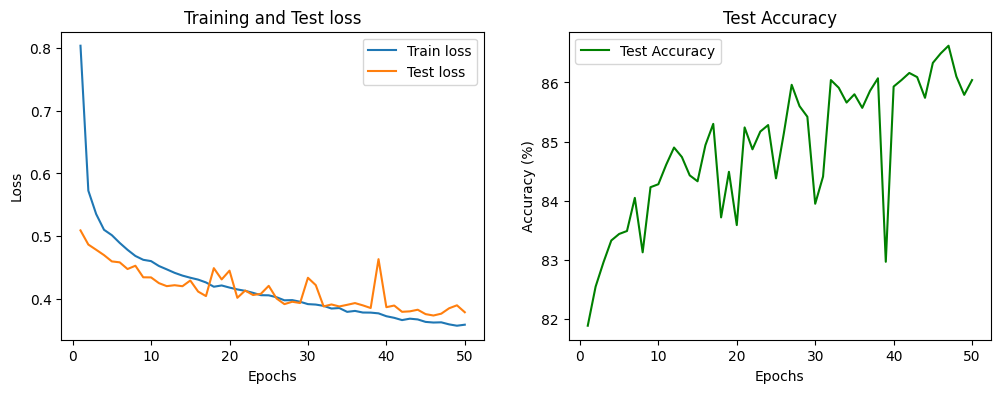

In [ ]:
#comparing train and test score through plotting
plt.figure(figsize=(12,4))

#traing and test loss
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_losses,label = 'Train loss')
plt.plot(range(1,epochs+1),test_losses,label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test loss')
plt.legend()
#test accuracy
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),test_accuracies,label = 'Test Accuracy',color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

# **Training with Relu activation and SGD as Optimizer**

In [ ]:
class myNN_ReLU_SGD(nn.Module):

  def __init__(self,num_features):

    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.ReLU(),
        nn.Linear(512,128),
        nn.ReLU(),
        nn.Linear(128,10)
    )
  def forward(self,x):
    return self.model(x)


In [ ]:
# NN initialization
model2 = myNN_ReLU_SGD(new_train.shape[1]).to(device)
#Loss Function already initialized
#Optimizer Function initialization
optimizer2 = optim.SGD(model2.parameters(),lr=learning_rate)

In [ ]:
train_losses = []
test_losses = []
test_accuracies = []


for epoch in range(epochs):

  model2.train()
  running_loss = 0.0

  for batch_features,batch_lables in train_loader:

    batch_features,batch_lables = batch_features.to(device),batch_lables.to(device)

    output = model2(batch_features)

    loss = criterion(output,batch_lables)

    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

    running_loss += loss.item()

  train_losses.append(running_loss / len(train_loader))

  # Testing
  model2.eval()
  test_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model2(images)
          loss = criterion(outputs, labels)
          test_loss += loss.item()
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  test_losses.append(test_loss / len(test_loader))
  test_accuracies.append(100 * correct / total)

  print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%")

Epoch 1/50 -> Train Loss: 0.7092, Test Loss: 0.6474, Test Accuracy: 76.08%
Epoch 2/50 -> Train Loss: 0.5859, Test Loss: 0.5955, Test Accuracy: 78.60%
Epoch 3/50 -> Train Loss: 0.5267, Test Loss: 0.5232, Test Accuracy: 81.65%
Epoch 4/50 -> Train Loss: 0.4933, Test Loss: 0.5436, Test Accuracy: 80.01%
Epoch 5/50 -> Train Loss: 0.4725, Test Loss: 0.5019, Test Accuracy: 82.36%
Epoch 6/50 -> Train Loss: 0.4555, Test Loss: 0.4903, Test Accuracy: 82.86%
Epoch 7/50 -> Train Loss: 0.4428, Test Loss: 0.4671, Test Accuracy: 83.29%
Epoch 8/50 -> Train Loss: 0.4323, Test Loss: 0.4836, Test Accuracy: 81.81%
Epoch 9/50 -> Train Loss: 0.4225, Test Loss: 0.4453, Test Accuracy: 84.08%
Epoch 10/50 -> Train Loss: 0.4130, Test Loss: 0.4374, Test Accuracy: 84.22%
Epoch 11/50 -> Train Loss: 0.4042, Test Loss: 0.4413, Test Accuracy: 84.10%
Epoch 12/50 -> Train Loss: 0.3970, Test Loss: 0.4416, Test Accuracy: 84.10%
Epoch 13/50 -> Train Loss: 0.3892, Test Loss: 0.4474, Test Accuracy: 84.50%
Epoch 14/50 -> Train 

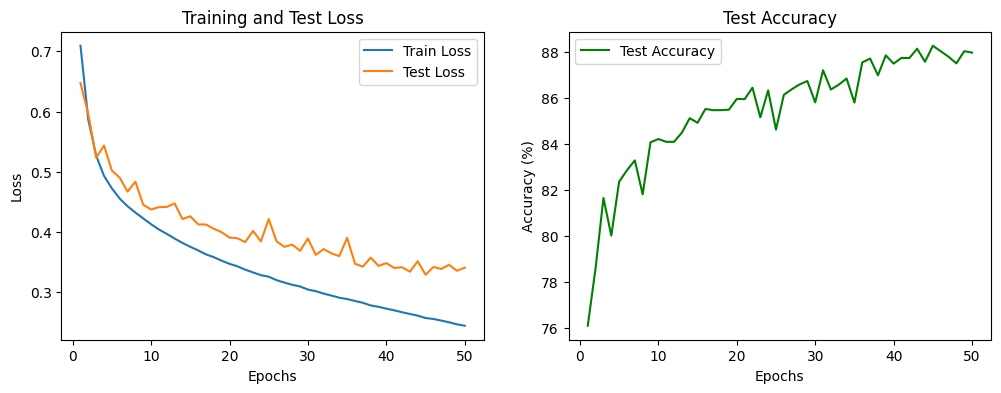

In [ ]:
# 5. Plotting
plt.figure(figsize=(12, 4))

# Training and Test Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

## **After doing parameter tuning, result is below.**

In [ ]:
class myNN_ReLU_SGD_pt(nn.Module):

  def __init__(self,num_features):

    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(512,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128,10)
    )
  def forward(self,x):
    return self.model(x)


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
model2_pt = myNN_ReLU_SGD_pt(new_train.shape[1]).to(device)
optimizer2_pt = optim.SGD(model2_pt.parameters(),lr=learning_rate, weight_decay=1e-4)#,momentum=0.9)
# scheduler = ReduceLROnPlateau(optimizer2_pt, mode='min', factor=0.5, patience = 3, verbose = True)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir='runs/fashion_mnist_logs')
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []


for epoch in range(epochs):

  model2_pt.train()
  running_loss = 0.0
  correct = 0
  total = 0
  for batch_features,batch_lables in train_loader:

    batch_features,batch_lables = batch_features.to(device),batch_lables.to(device)

    output = model2_pt(batch_features)

    loss = criterion(output,batch_lables)

    optimizer2_pt.zero_grad()
    loss.backward()
    optimizer2_pt.step()

    running_loss += loss.item()
    _,predicted = torch.max(output,1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()


  epoch_loss = running_loss / len(train_loader)
  epoch_accuracy = 100 * correct / total
  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_accuracy)
  #log loss and accuracy to Tensorboard
  writer.add_scalar('loss/train',epoch_loss,epoch)
  writer.add_scalar('Accuracy/train',epoch_accuracy,epoch)

  # Validation Loop
  model2_pt.eval()
  test_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model2_pt(images)
          loss = criterion(outputs, labels)
          test_loss += loss.item()
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  val_loss = test_loss / len(test_loader)
  val_accuracy = 100 * correct / total
  test_losses.append(val_loss)
  test_accuracies.append(val_accuracy)

  #log loss and Accuracy to Tensorboard
  writer.add_scalar('loss/val',val_loss,epoch)
  writer.add_scalar('Accuracy/val',val_accuracy,epoch)

  # scheduler.step(test_losses[-1])
  print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Accuracy: {test_accuracies[-1]:.2f}%")

Epoch 1/50 -> Train Loss: 0.8453, Test Loss: 0.5117, Test Accuracy: 81.73%
Epoch 2/50 -> Train Loss: 0.5672, Test Loss: 0.4489, Test Accuracy: 83.73%
Epoch 3/50 -> Train Loss: 0.5104, Test Loss: 0.4205, Test Accuracy: 84.44%
Epoch 4/50 -> Train Loss: 0.4822, Test Loss: 0.4029, Test Accuracy: 85.26%
Epoch 5/50 -> Train Loss: 0.4530, Test Loss: 0.3933, Test Accuracy: 85.62%
Epoch 6/50 -> Train Loss: 0.4398, Test Loss: 0.3792, Test Accuracy: 86.07%
Epoch 7/50 -> Train Loss: 0.4248, Test Loss: 0.3731, Test Accuracy: 86.14%
Epoch 8/50 -> Train Loss: 0.4123, Test Loss: 0.3641, Test Accuracy: 86.60%
Epoch 9/50 -> Train Loss: 0.4032, Test Loss: 0.3544, Test Accuracy: 86.92%
Epoch 10/50 -> Train Loss: 0.3930, Test Loss: 0.3561, Test Accuracy: 86.79%
Epoch 11/50 -> Train Loss: 0.3839, Test Loss: 0.3479, Test Accuracy: 87.36%
Epoch 12/50 -> Train Loss: 0.3770, Test Loss: 0.3439, Test Accuracy: 87.36%
Epoch 13/50 -> Train Loss: 0.3718, Test Loss: 0.3370, Test Accuracy: 87.68%
Epoch 14/50 -> Train 

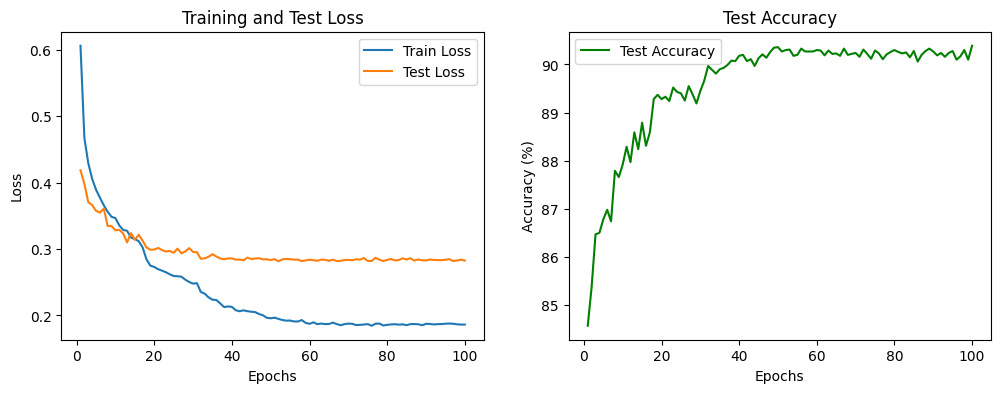

In [ ]:
# 5. Plotting
plt.figure(figsize=(12, 4))

# Training and Test Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy', color='red')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

# **Training with Sigmoid activation and Adam as Optimizer**

In [ ]:
class myNN_Sigmoid_Adam(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.Sigmoid(),
        nn.Linear(512,128),
        nn.Sigmoid(),
        nn.Linear(128,10)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
#model initialization
model3 = myNN_Sigmoid_Adam(new_train.shape[1]).to(device)
#Loss function will remain same
# initializing optimizer function
optimizer3 = optim.Adam(model3.parameters(),lr=learning_rate)

In [ ]:
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):

  model3.train()
  running_loss = 0.0

  for batch_features,batch_labels in train_loader:

    batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)

    output = model3(batch_features)

    loss = criterion(output,batch_labels)

    optimizer3.zero_grad()

    loss.backward()

    optimizer3.step()

    running_loss += loss.item()

  train_losses.append(running_loss / len(train_loader))
  #test loss
  model3.eval()

  test_loss = 0.0
  correct = 0
  total = 0

  with torch.no_grad():
    for images,labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model3(images)
      loss = criterion(outputs,labels)
      test_loss += loss.item()
      _,predicted = torch.max(outputs,1) #this one calculates the index of predicted max number from output array. e.g. [0.2,0.3,0.98,0.34,0.56,...]
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  test_losses.append(test_loss / len(test_loader))
  test_accuracies.append(100 * correct / total)
  print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%")

Epoch 1/50 -> Train Loss: 0.5596, Test Loss: 0.4858, Test Accuracy: 82.69%
Epoch 2/50 -> Train Loss: 0.4559, Test Loss: 0.5054, Test Accuracy: 82.79%
Epoch 3/50 -> Train Loss: 0.4489, Test Loss: 0.4855, Test Accuracy: 83.37%
Epoch 4/50 -> Train Loss: 0.4539, Test Loss: 0.4779, Test Accuracy: 83.23%
Epoch 5/50 -> Train Loss: 0.4461, Test Loss: 0.4817, Test Accuracy: 83.05%
Epoch 6/50 -> Train Loss: 0.4433, Test Loss: 0.4994, Test Accuracy: 82.78%
Epoch 7/50 -> Train Loss: 0.4389, Test Loss: 0.4694, Test Accuracy: 83.47%
Epoch 8/50 -> Train Loss: 0.4360, Test Loss: 0.4676, Test Accuracy: 83.87%
Epoch 9/50 -> Train Loss: 0.4273, Test Loss: 0.5090, Test Accuracy: 83.05%
Epoch 10/50 -> Train Loss: 0.4228, Test Loss: 0.4813, Test Accuracy: 82.29%
Epoch 11/50 -> Train Loss: 0.4257, Test Loss: 0.4796, Test Accuracy: 84.07%
Epoch 12/50 -> Train Loss: 0.4231, Test Loss: 0.5048, Test Accuracy: 82.72%
Epoch 13/50 -> Train Loss: 0.4243, Test Loss: 0.5035, Test Accuracy: 84.02%
Epoch 14/50 -> Train 

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (41,) and (42,)

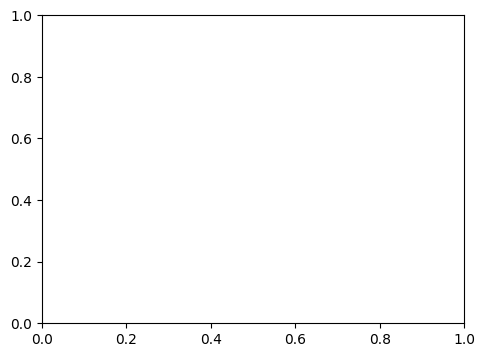

In [ ]:
#comparing train and test score through plotting
plt.figure(figsize=(12,4))

#traing and test loss
plt.subplot(1,2,1)
plt.plot(range(1,42),train_losses,label = 'Train loss')
plt.plot(range(1,42),test_losses,label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test loss')
plt.legend()
#test accuracy
plt.subplot(1,2,2)
plt.plot(range(1,42),test_accuracies,label = 'Test Accuracy',color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

## After doing parameter tuning, result is below.

In [ ]:
class myNN_Sigmoid_Adam_pt(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.BatchNorm1d(512),
        nn.Sigmoid(),
        nn.Dropout(p=0.1),
        nn.Linear(512,128),
        nn.BatchNorm1d(128),
        nn.Sigmoid(),
        nn.Dropout(p=0.1),
        nn.Linear(128,10)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
model3_pt = myNN_Sigmoid_Adam_pt(new_train.shape[1]).to(device)
optimizer3_pt = optim.Adam(model3_pt.parameters(),lr=0.001, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer3_pt, mode='min', factor = 0.5, patience = 3)

In [ ]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir='runs/fashion_mnist_logs')
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
lr_history = []


for epoch in range(epochs):

  model3_pt.train()
  running_loss = 0.0
  correct = 0
  total = 0
  for batch_features,batch_lables in train_loader:

    batch_features,batch_lables = batch_features.to(device),batch_lables.to(device)

    output = model3_pt(batch_features)

    loss = criterion(output,batch_lables)

    optimizer3_pt.zero_grad()
    loss.backward()
    optimizer3_pt.step()

    running_loss += loss.item()
    _,predicted = torch.max(output,1)
    total += batch_lables.size(0)
    correct += (predicted == batch_lables).sum().item()


  epoch_loss = running_loss / len(train_loader)
  epoch_accuracy = 100 * correct / total
  train_losses.append(epoch_loss)
  train_accuracies.append(epoch_accuracy)
  #log loss and accuracy to Tensorboard
  writer.add_scalar('loss/train',epoch_loss,epoch)
  writer.add_scalar('Accuracy/train',epoch_accuracy,epoch)

  # Validation Loop
  model3_pt.eval()
  test_loss = 0.0
  correct = 0
  total = 0
  with torch.no_grad():
      for images, labels in test_loader:
          images, labels = images.to(device), labels.to(device)
          outputs = model3_pt(images)
          loss = criterion(outputs, labels)
          test_loss += loss.item()
          _, predicted = torch.max(outputs, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  val_loss = test_loss / len(test_loader)
  val_accuracy = 100 * correct / total
  test_losses.append(val_loss)
  test_accuracies.append(val_accuracy)

  #log loss and Accuracy to Tensorboard
  writer.add_scalar('loss/val',val_loss,epoch)
  writer.add_scalar('Accuracy/val',val_accuracy,epoch)

  # Track the current learning rate
  current_lr = optimizer3_pt.param_groups[0]['lr']
  lr_history.append(current_lr)

  scheduler.step(val_loss)
  print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_losses[-1]:.4f},  Test Loss: {test_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Accuracy: {test_accuracies[-1]:.2f}%")

writer.close()

Epoch 1/50 -> Train Loss: 0.6595,  Test Loss: 0.4828, Train Accuracy: 80.78%, Test Accuracy: 82.91%
Epoch 2/50 -> Train Loss: 0.4688,  Test Loss: 0.4480, Train Accuracy: 83.65%, Test Accuracy: 84.18%
Epoch 3/50 -> Train Loss: 0.4439,  Test Loss: 0.4625, Train Accuracy: 84.33%, Test Accuracy: 83.35%
Epoch 4/50 -> Train Loss: 0.4313,  Test Loss: 0.4567, Train Accuracy: 84.59%, Test Accuracy: 83.59%
Epoch 5/50 -> Train Loss: 0.4169,  Test Loss: 0.4601, Train Accuracy: 84.90%, Test Accuracy: 83.38%
Epoch 6/50 -> Train Loss: 0.4070,  Test Loss: 0.4083, Train Accuracy: 85.44%, Test Accuracy: 85.33%
Epoch 7/50 -> Train Loss: 0.3943,  Test Loss: 0.4331, Train Accuracy: 85.75%, Test Accuracy: 84.05%
Epoch 8/50 -> Train Loss: 0.3861,  Test Loss: 0.3916, Train Accuracy: 85.95%, Test Accuracy: 86.05%
Epoch 9/50 -> Train Loss: 0.3769,  Test Loss: 0.4369, Train Accuracy: 86.25%, Test Accuracy: 83.26%
Epoch 10/50 -> Train Loss: 0.3686,  Test Loss: 0.4059, Train Accuracy: 86.71%, Test Accuracy: 85.15%

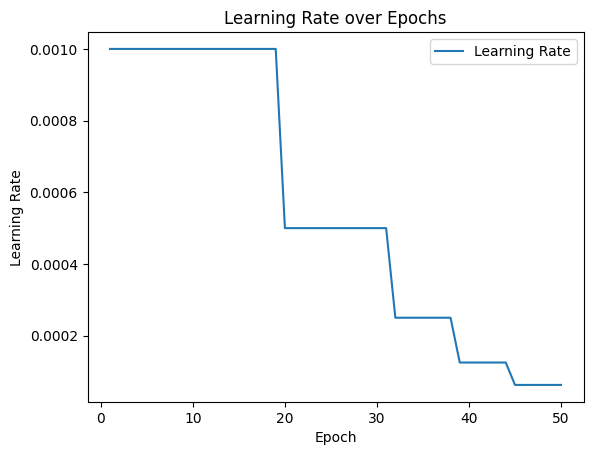

In [ ]:
#Plotting Learning Rate
plt.plot(range(1, epochs + 1), lr_history, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate over Epochs')
plt.legend()
plt.show()

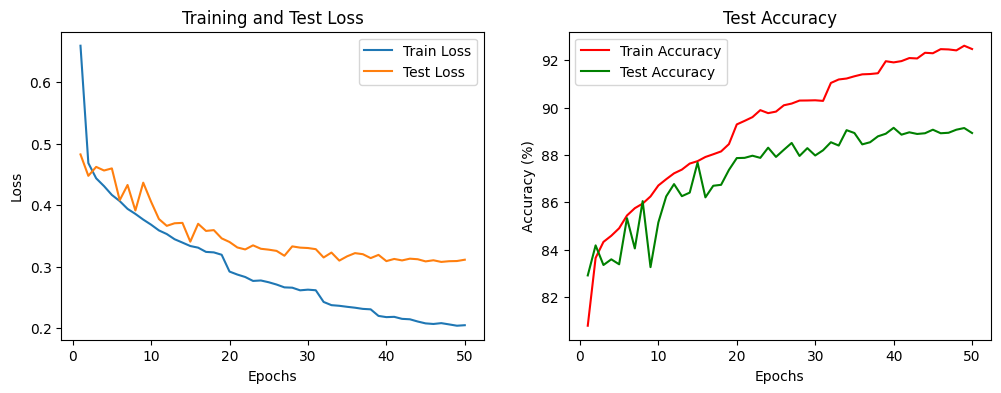

In [ ]:
# 5. Plotting Comparison Train Loss Vs. Test Loss
plt.figure(figsize=(12, 4))

# Training and Test Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy', color='red')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

In [ ]:
import tensorboard
!tensorboard --logdir=runs\fashion_mnist_logs

2025-01-10 17:01:30.014770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736528490.040750   46542 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736528490.049823   46542 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-10 17:01:33.206706: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/usr/local/bin/ten

In [ ]:
rm -rf runs/fashion_mnist_logs/*

# **Training Neural Network with ReLU and Adam as optimizer**

In [ ]:
class myNN_ReLU_Adam(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.ReLU(),
        nn.Linear(512,128),
        nn.ReLU(),
        nn.Linear(128,10)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
#model initialization
model4 = myNN_ReLU_Adam(new_train.shape[1]).to(device)
#Loss function will remain same
# initializing optimizer function
optimizer4 = optim.Adam(model4.parameters(),lr=learning_rate)

In [ ]:
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):

  model3.train()
  running_loss = 0.0

  for batch_features,batch_labels in train_loader:

    batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)

    output = model4(batch_features)

    loss = criterion(output,batch_labels)

    optimizer4.zero_grad()

    loss.backward()

    optimizer4.step()

    running_loss += loss.item()

  train_losses.append(running_loss / len(train_loader))
  #test loss
  model3.eval()

  test_loss = 0.0
  correct = 0
  total = 0

  with torch.no_grad():
    for images,labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model4(images)
      loss = criterion(outputs,labels)
      test_loss += loss.item()
      _,predicted = torch.max(outputs,1) #this one calculates the index of predicted max number from output array. e.g. [0.2,0.3,0.98,0.34,0.56,...]
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  test_losses.append(test_loss / len(test_loader))
  test_accuracies.append(100 * correct / total)
  print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%")

Epoch 1/50 -> Train Loss: 0.5289, Test Loss: 0.4783, Test Accuracy: 83.56%
Epoch 2/50 -> Train Loss: 0.4111, Test Loss: 0.4581, Test Accuracy: 84.36%
Epoch 3/50 -> Train Loss: 0.3867, Test Loss: 0.4448, Test Accuracy: 83.99%
Epoch 4/50 -> Train Loss: 0.3662, Test Loss: 0.4578, Test Accuracy: 83.33%
Epoch 5/50 -> Train Loss: 0.3575, Test Loss: 0.4016, Test Accuracy: 86.25%
Epoch 6/50 -> Train Loss: 0.3531, Test Loss: 0.4336, Test Accuracy: 85.17%
Epoch 7/50 -> Train Loss: 0.3475, Test Loss: 0.4175, Test Accuracy: 85.83%
Epoch 8/50 -> Train Loss: 0.3364, Test Loss: 0.4372, Test Accuracy: 84.67%
Epoch 9/50 -> Train Loss: 0.3334, Test Loss: 0.4164, Test Accuracy: 86.43%
Epoch 10/50 -> Train Loss: 0.3275, Test Loss: 0.4111, Test Accuracy: 86.70%
Epoch 11/50 -> Train Loss: 0.3274, Test Loss: 0.4599, Test Accuracy: 84.98%
Epoch 12/50 -> Train Loss: 0.3209, Test Loss: 0.4114, Test Accuracy: 86.12%
Epoch 13/50 -> Train Loss: 0.3203, Test Loss: 0.4201, Test Accuracy: 85.93%
Epoch 14/50 -> Train 

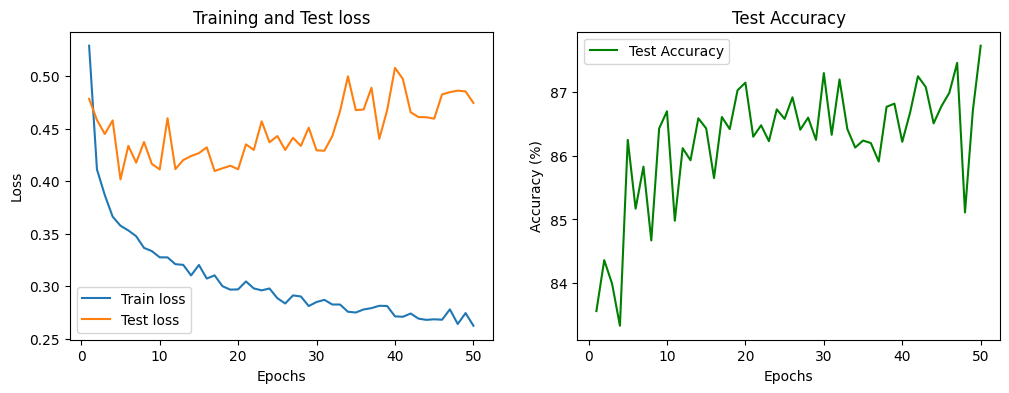

In [ ]:
#comparing train and test score through plotting
plt.figure(figsize=(12,4))

#traing and test loss
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_losses,label = 'Train loss')
plt.plot(range(1,epochs+1),test_losses,label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test loss')
plt.legend()
#test accuracy
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),test_accuracies,label = 'Test Accuracy',color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

## After doing parameter tuning, result is below.

In [ ]:
class myNN_ReLU_Adam_pt(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(512,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,10)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
model4_pt = myNN_ReLU_Adam_pt(new_train.shape[1]).to(device)
optimizer4_pt = optim.Adam(model4_pt.parameters(),lr=learning_rate, weight_decay=1e-4)

In [ ]:
train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):

  model4_pt.train()
  running_loss = 0.0

  for batch_features,batch_labels in train_loader:

    batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)

    output = model4_pt(batch_features)

    loss = criterion(output,batch_labels)

    optimizer4_pt.zero_grad()

    loss.backward()

    optimizer4_pt.step()

    running_loss += loss.item()

  train_losses.append(running_loss / len(train_loader))
  #test loss
  model4_pt.eval()

  test_loss = 0.0
  correct = 0
  total = 0

  with torch.no_grad():
    for images,labels in test_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model4_pt(images)
      loss = criterion(outputs,labels)
      test_loss += loss.item()
      _,predicted = torch.max(outputs,1) #this one calculates the index of predicted max number from output array. e.g. [0.2,0.3,0.98,0.34,0.56,...]
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  test_losses.append(test_loss / len(test_loader))
  test_accuracies.append(100 * correct / total)
  print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%")

Epoch 1/50 -> Train Loss: 0.5667, Test Loss: 0.5134, Test Accuracy: 80.73%
Epoch 2/50 -> Train Loss: 0.5225, Test Loss: 0.5245, Test Accuracy: 81.56%
Epoch 3/50 -> Train Loss: 0.5153, Test Loss: 0.5264, Test Accuracy: 80.58%
Epoch 4/50 -> Train Loss: 0.5112, Test Loss: 0.4882, Test Accuracy: 82.73%
Epoch 5/50 -> Train Loss: 0.5068, Test Loss: 0.4318, Test Accuracy: 83.64%
Epoch 6/50 -> Train Loss: 0.5061, Test Loss: 0.4369, Test Accuracy: 83.88%
Epoch 7/50 -> Train Loss: 0.5033, Test Loss: 0.4840, Test Accuracy: 81.53%
Epoch 8/50 -> Train Loss: 0.5002, Test Loss: 0.4533, Test Accuracy: 83.48%
Epoch 9/50 -> Train Loss: 0.5029, Test Loss: 0.4996, Test Accuracy: 81.40%
Epoch 10/50 -> Train Loss: 0.5008, Test Loss: 0.4802, Test Accuracy: 82.38%
Epoch 11/50 -> Train Loss: 0.5041, Test Loss: 0.4526, Test Accuracy: 83.75%
Epoch 12/50 -> Train Loss: 0.5001, Test Loss: 0.4367, Test Accuracy: 83.42%
Epoch 13/50 -> Train Loss: 0.4975, Test Loss: 0.4476, Test Accuracy: 83.54%
Epoch 14/50 -> Train 

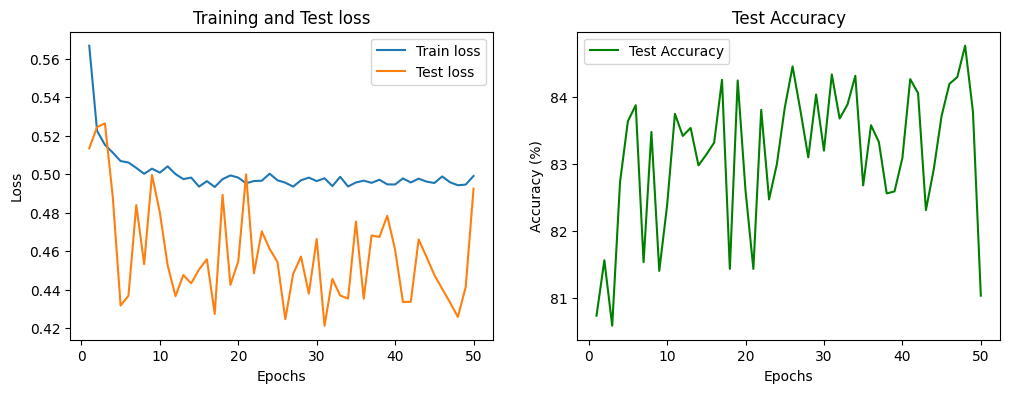

In [ ]:
#comparing train and test score through plotting
plt.figure(figsize=(12,4))

#traing and test loss
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_losses,label = 'Train loss')
plt.plot(range(1,epochs+1),test_losses,label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test loss')
plt.legend()
#test accuracy
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),test_accuracies,label = 'Test Accuracy',color = 'green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy')
plt.legend()

plt.show()

# **Weights comparisons for different models**



In [ ]:
print(model.state_dict().keys())

odict_keys(['model.0.weight', 'model.0.bias', 'model.2.weight', 'model.2.bias', 'model.4.weight', 'model.4.bias'])


In [ ]:
model.state_dict()['model.0.weight']

tensor([[-0.0301,  0.0212,  0.0186,  ...,  0.0159, -0.0016,  0.0147],
        [-0.0313, -0.0264, -0.0112,  ..., -0.0152, -0.0330, -0.0215],
        [ 0.0053, -0.0053, -0.0341,  ...,  0.0130, -0.0034,  0.0331],
        ...,
        [-0.0023,  0.0337, -0.0290,  ...,  0.0106,  0.0271,  0.0251],
        [-0.0010, -0.0073,  0.0220,  ...,  0.0006,  0.0151,  0.0248],
        [-0.0316,  0.0152, -0.0029,  ...,  0.0043,  0.0185, -0.0002]],
       device='cuda:0')

In [ ]:
model3.state_dict()['model.0.weight']

tensor([[ 0.0559,  0.0883,  0.8585,  ..., -2.1047, -0.3818,  0.4333],
        [ 0.3276,  0.5200,  0.9792,  ..., -0.1592,  0.3350,  0.3446],
        [ 1.3689, -0.0066,  0.6944,  ..., -6.1404,  0.6571,  0.2901],
        ...,
        [-0.0421,  0.3450,  0.4672,  ..., -0.2258, -0.4945,  0.3050],
        [-0.2464, -0.5751, -0.3128,  ...,  0.6670,  0.5570, -0.3634],
        [ 0.0181, -0.4865,  1.6255,  ...,  1.4725,  1.0518,  1.5085]],
       device='cuda:0')

In [ ]:
model4.state_dict()['model.0.weight']

tensor([[-0.0242, -0.0204,  0.0327,  ..., -0.0660, -0.0452, -0.0097],
        [ 0.0140,  0.0214,  0.0232,  ..., -0.0695, -0.0740,  0.0215],
        [ 0.1120,  0.1498,  0.0697,  ...,  0.0017,  0.1266,  0.2174],
        ...,
        [-0.0269, -0.0291, -0.0024,  ..., -0.0748,  0.0276, -0.0288],
        [ 0.0017, -0.0244, -0.0350,  ...,  0.0953,  0.0702,  0.0304],
        [ 0.0185, -0.0089, -0.0157,  ...,  0.1513,  0.2085, -0.0083]],
       device='cuda:0')

In [ ]:
weights1 = model.state_dict()
weights2 = model2.state_dict()
weights3 = model3.state_dict()
weights4 = model4.state_dict()

In [ ]:
model4_weights = weights4['model.0.weight']
torch.tensor(model4_weights,dtype=torch.float64)

<ipython-input-45-e2fcbd8f84e3>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(model4_weights,dtype=torch.float64)


tensor([[-0.0242, -0.0204,  0.0327,  ..., -0.0660, -0.0452, -0.0097],
        [ 0.0140,  0.0214,  0.0232,  ..., -0.0695, -0.0740,  0.0215],
        [ 0.1120,  0.1498,  0.0697,  ...,  0.0017,  0.1266,  0.2174],
        ...,
        [-0.0269, -0.0291, -0.0024,  ..., -0.0748,  0.0276, -0.0288],
        [ 0.0017, -0.0244, -0.0350,  ...,  0.0953,  0.0702,  0.0304],
        [ 0.0185, -0.0089, -0.0157,  ...,  0.1513,  0.2085, -0.0083]],
       device='cuda:0', dtype=torch.float64)

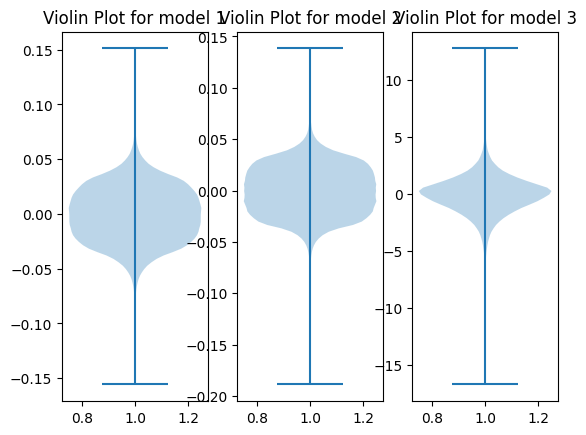

In [ ]:
plt.figure()
plt.subplot(1,3,1)
plt.violinplot(weights1['model.0.weight'].cpu().flatten().numpy()) # Move tensor to CPU before converting to NumPy
plt.title(f"Violin Plot for model 1")
plt.subplot(1,3,2)
plt.violinplot(weights2['model.0.weight'].cpu().flatten().numpy()) # Move tensor to CPU before converting to NumPy
plt.title(f"Violin Plot for model 2")
plt.subplot(1,3,3)
plt.violinplot(weights3['model.0.weight'].cpu().flatten().numpy()) # Move tensor to CPU before converting to NumPy
plt.title(f"Violin Plot for model 3")
plt.show()

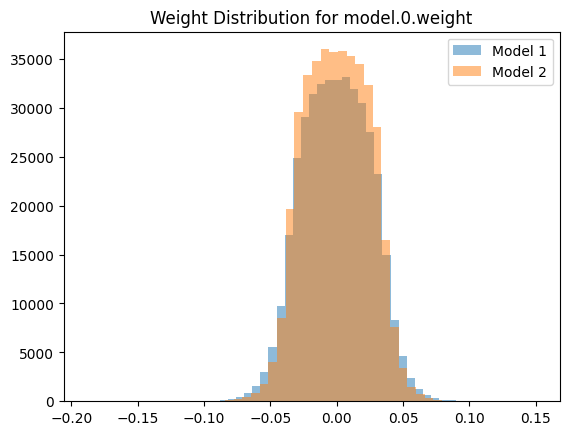

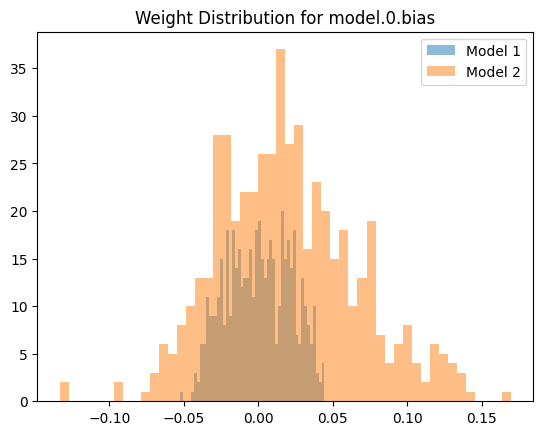

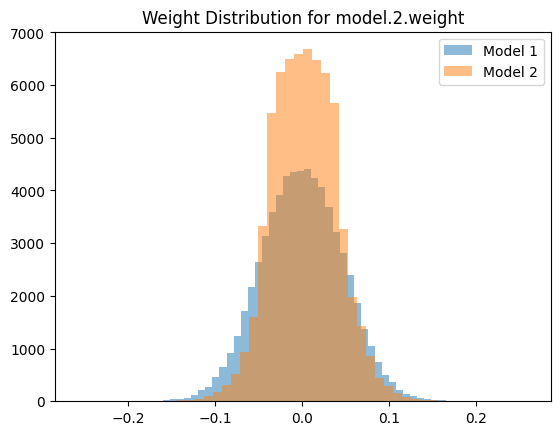

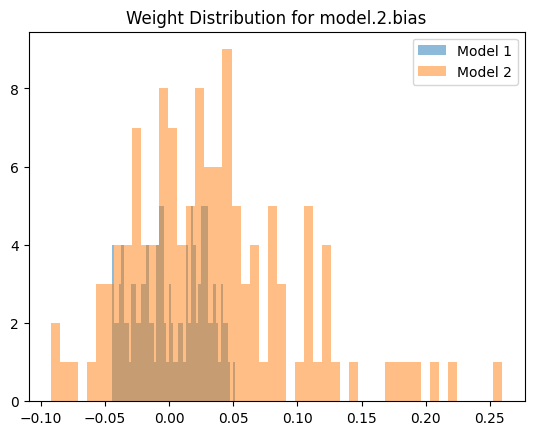

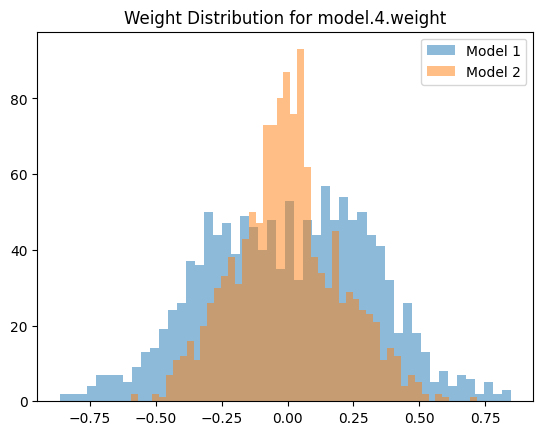

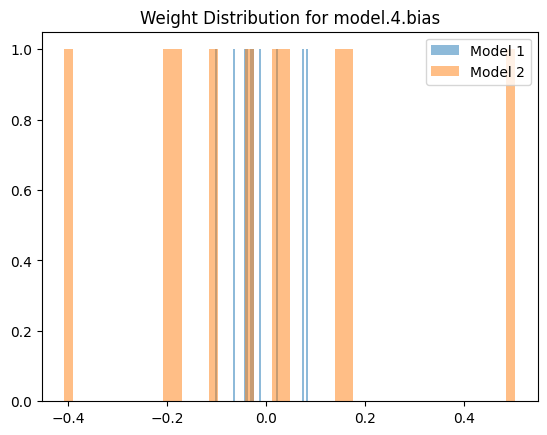

In [ ]:
for key in weights1.keys():
    plt.figure()
    plt.hist(weights1[key].cpu().flatten().numpy(), bins=50, alpha=0.5, label="Model 1")
    plt.hist(weights2[key].cpu().flatten().numpy(), bins=50, alpha=0.5, label="Model 2")
    plt.title(f"Weight Distribution for {key}")
    plt.legend()
    plt.show()

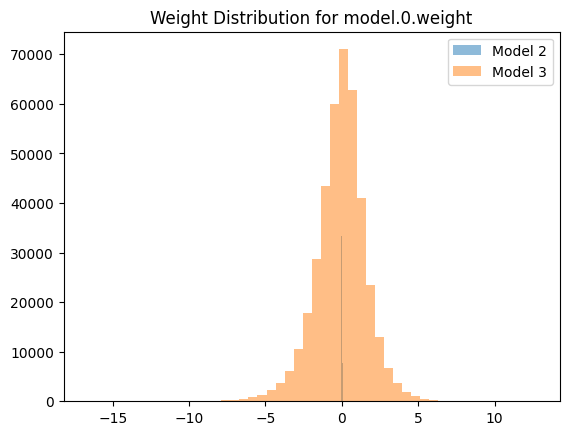

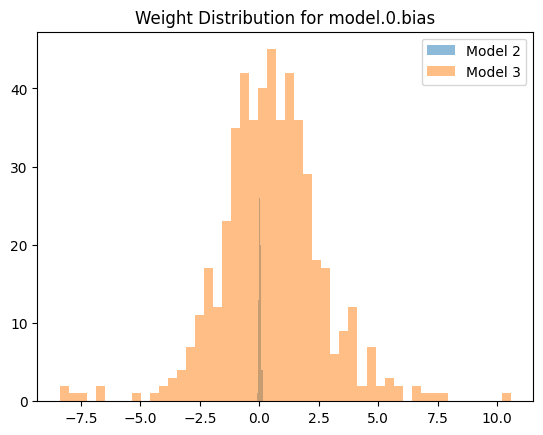

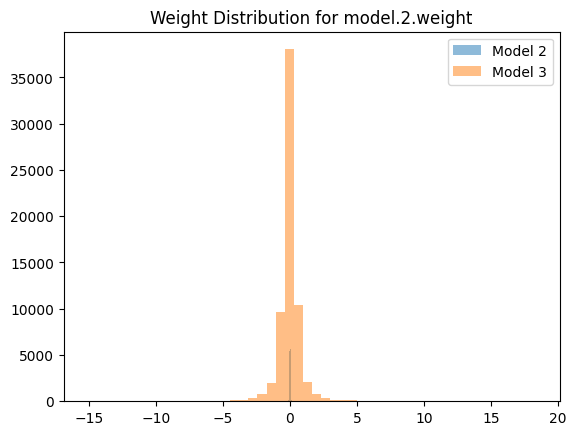

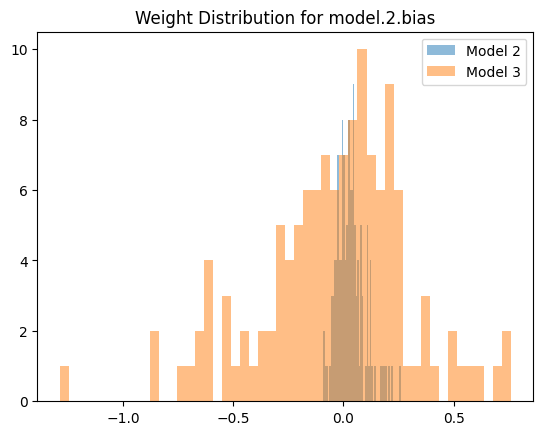

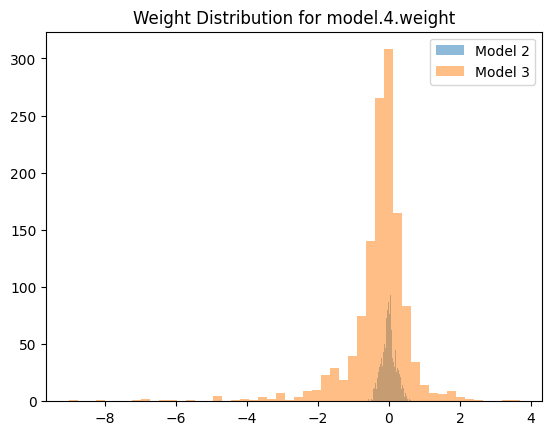

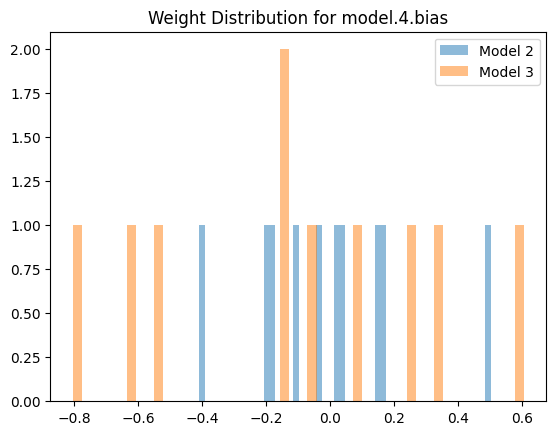

In [ ]:
for key in weights2.keys():
    plt.figure()
    plt.hist(weights2[key].cpu().flatten().numpy(), bins=50, alpha=0.5, label="Model 2")
    plt.hist(weights3[key].cpu().flatten().numpy(), bins=50, alpha=0.5, label="Model 3")
    plt.title(f"Weight Distribution for {key}")
    plt.legend()
    plt.show()

In [ ]:
weights3_pt = model3_pt.state_dict()
for key in weights3.keys():
    plt.figure()
    plt.hist(weights3[key].cpu().flatten().numpy(), bins=50, alpha=0.5, label="Model 3")
    plt.hist(weights3_pt[key].cpu().flatten().numpy(), bins=50, alpha=0.5, label="Model 3 - post parameter tuning")
    plt.title(f"Weight Distribution for {key}")
    plt.legend()
    plt.show()

In [ ]:
model3.state_dict()

NameError: name 'model3' is not defined